<a href="https://colab.research.google.com/github/mukeshrock7897/TensorFlow_Notes/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Keras**
* Keras is a high-level API for building and training deep learning models.
* Keras is an open-source library that provides a Python interface for artificial neural networks.
* Keras was first independent software, then integrated into the TensorFlow library
* Mainly used to develop the neural networks
*. It also supports multiple backend neural network computation.
* In TensorFlow 2.0, Keras is integrated as tf.keras, making it easier to build and train models. It provides a user-friendly, modular, and composable approach to building neural networks.

**tf.keras**

**1. tf.keras.Sequential**

* Used to create a linear stack of layers.

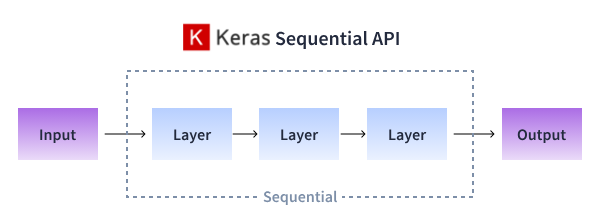

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 2762 (10.79 KB)
Trainable params: 2762 (10.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


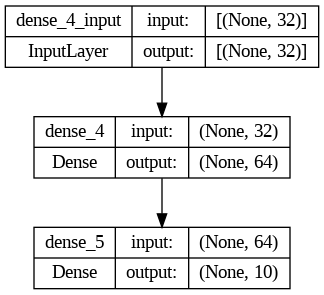

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary to understand the architecture
model.summary()

# Generate a graphical representation of the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**Explanation of the Model Structure**
* Input Layer: Accepts an input with 32 features.
* First Dense Layer: Contains 64 neurons with ReLU activation, transforming the input to 64-dimensional space.
* Second Dense Layer: Contains 10 neurons with Softmax activation, providing output probabilities for 10 classes.

**2. tf.keras.Model**
* A base class used to create custom models.

In [5]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

model = MyModel()

**3. tf.keras.layers**
* A module that provides a wide range of neural network layers.
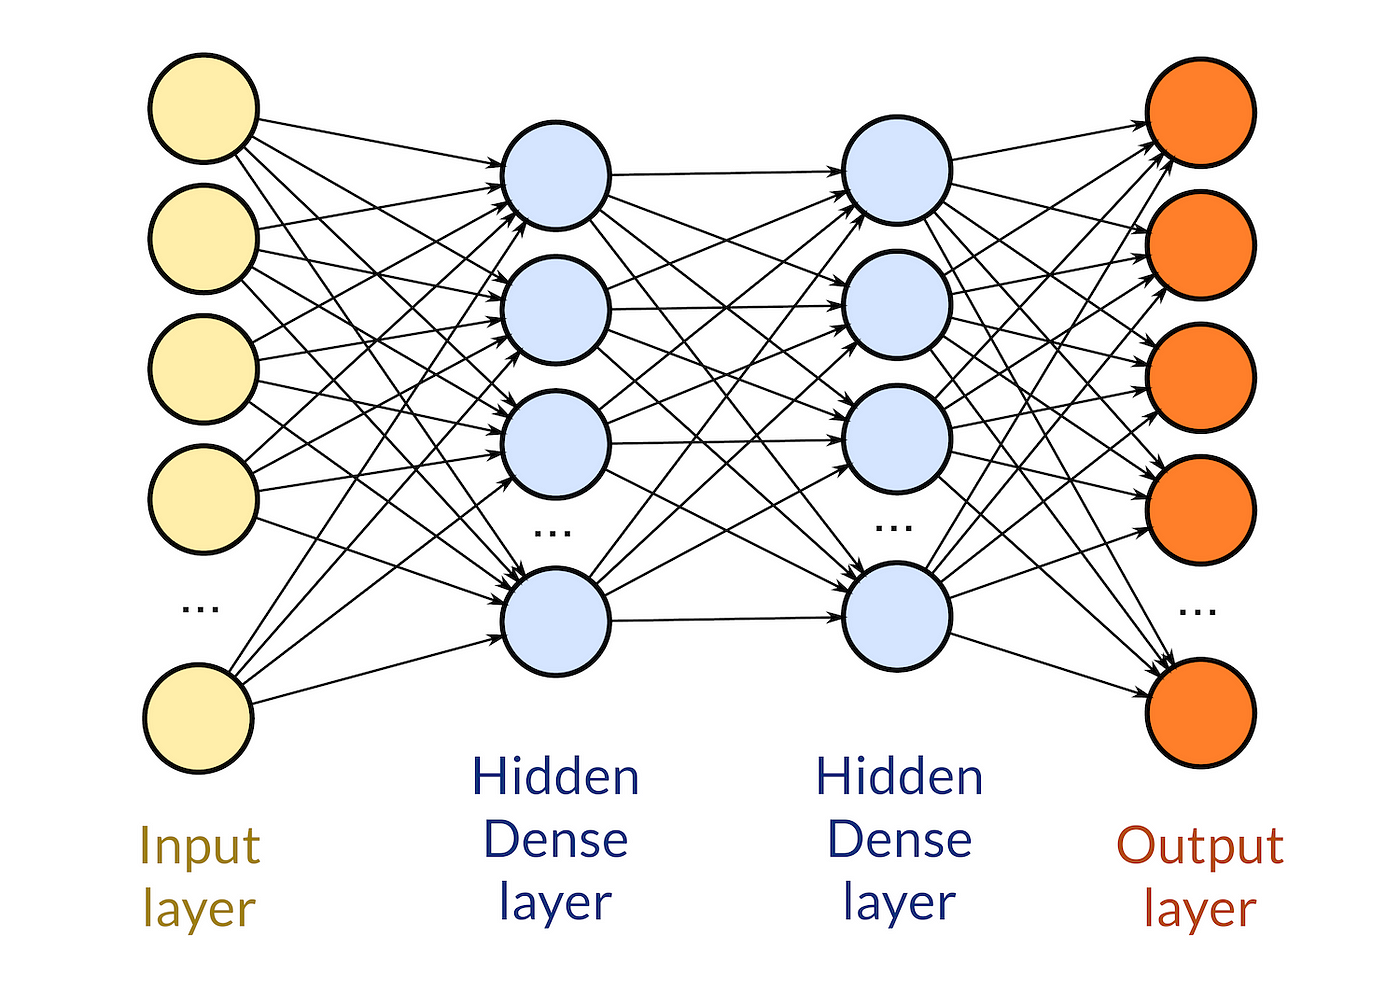

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                346176    
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

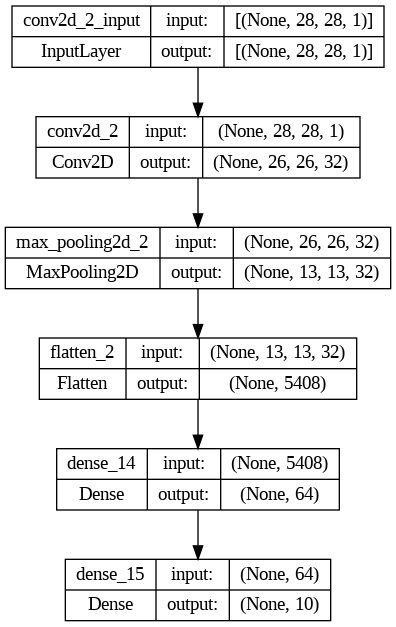

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

# Generate a graphical representation of the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**4. tf.keras.optimizers**
* A module that provides optimizers to train the model.

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**5. tf.keras.losses**
* A module that provides various loss functions.


In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])


**6. tf.keras.metrics**
* A module that provides metrics to evaluate the model.

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.Accuracy()])


**7. tf.keras.callbacks**
* A module that provides callbacks to customize the training process.

In [15]:
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
#     tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True)
# ]

# model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=callbacks)


**8. tf.keras.preprocessing**
* A module that provides utilities for data preprocessing and augmentation.

In [17]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# datagen.fit(x_train)


**9. tf.keras.datasets**
* A module that provides access to commonly used datasets.


In [19]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


**10. tf.keras.utils**
* A module that provides utilities like converting labels to one-hot encoding.

In [20]:
# y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)


**11. tf.keras.constraints**
* The tf.keras.constraints module allows you to set constraints (like max norm, non-negativity, unit norm, etc.) on the weights of a layer during optimization.

In [24]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(2.0), input_shape=(32,)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                2112      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 2762 (10.79 KB)
Trainable params: 2762 (10.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**12. tf.keras.mixed_precision**
* The tf.keras.mixed_precision module allows you to use mixed precision training, which can improve performance by using float16 and float32 data types.

In [23]:
import tensorflow as tf

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 2762 (10.79 KB)
Trainable params: 2762 (10.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**13. tf.keras.quantizers**
* The tf.keras.quantizers module allows for quantization-aware training, which helps in creating models that can be efficiently converted to lower precision.

In [31]:
# from tensorflow_model_optimization.quantization.keras import quantize_model, quantize_annotate_layer
# import tensorflow as tf

# model = tf.keras.Sequential([
#     quantize_annotate_layer(tf.keras.layers.Dense(64, activation='relu', input_shape=(32,))),
#     quantize_annotate_layer(tf.keras.layers.Dense(10, activation='softmax'))
# ])

# quantized_model = quantize_model(model)


**14. tf.random**
* The tf.random module provides a suite of functions to generate random numbers and tensors with specific distributions.

In [32]:
import tensorflow as tf

random_tensor = tf.random.normal(shape=(2, 3), mean=0.0, stddev=1.0)
print(random_tensor)


tf.Tensor(
[[ 1.2026078   0.3257388  -0.7458542 ]
 [ 1.120318   -1.6200811  -0.44902763]], shape=(2, 3), dtype=float32)


**15. tf.keras.regularizers**
* The tf.keras.regularizers module allows you to apply regularization penalties on layer parameters, which helps prevent overfitting.

In [33]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(32,)),
    tf.keras.layers.Dense(10, activation='softmax')
])


**16. tf.nest**
* The tf.nest module provides utilities for working with nested structures of tensors.



In [34]:
import tensorflow as tf

nested_structure = {'a': [1, 2, 3], 'b': (4, 5)}

flattened = tf.nest.flatten(nested_structure)
print(flattened)

original = tf.nest.pack_sequence_as(nested_structure, flattened)
print(original)


[1, 2, 3, 4, 5]
{'a': [1, 2, 3], 'b': (4, 5)}


**17. tf.distribute**
* The tf.distribute module supports distributed training across multiple devices and machines.



In [35]:
import tensorflow as tf

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Example training data
x_train = tf.random.normal((1000, 32))
y_train = tf.random.uniform((1000,), maxval=10, dtype=tf.int32)

model.fit(x_train, y_train, epochs=10)


Epoch 1/10
32/32 [==============================] - 4s 6ms/step - loss: 2.5081 - accuracy: 0.0890
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 2.3763 - accuracy: 0.1150
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 2.3167 - accuracy: 0.1320
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 2.2732 - accuracy: 0.1470
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 2.2379 - accuracy: 0.1650
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 2.2060 - accuracy: 0.1910
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 2.1788 - accuracy: 0.1990
Epoch 8/10
32/32 [==============================] - 0s 9ms/step - loss: 2.1547 - accuracy: 0.2170
Epoch 9/10
32/32 [==============================] - 0s 9ms/step - loss: 2.1301 - accuracy: 0.2310
Epoch 10/10
32/32 [==============================] - 0s 9ms/step - loss: 2.1088 - accuracy: 0.2470


**18. tf.keras.mixed_precision.experimental.Policy**
* The tf.keras.mixed_precision.experimental.Policy module is used for setting policies to handle data types in models, especially for mixed precision training.

In [37]:
# import tensorflow as tf

# policy = tf.keras.mixed_precision.experimental.Policy('mixed_float16')
# tf.keras.mixed_precision.experimental.set_policy(policy)

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])


**19. tf.saved_model**
* The tf.saved_model module provides utilities for exporting and saving models.

In [38]:
import tensorflow as tf

# Define a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Save the model
model.save('my_model')

# Load the model
new_model = tf.keras.models.load_model('my_model')
